# Polars Introductions
This will be an attempt to learn the basic concepts and structures of the Polars library.  It has been heralded as a way to accelerate dataframe work.  The Documentation is quite detailed, so this is the starting point without reloading the entire documentation website. 

[Polars Documentation - Getting Started](https://docs.pola.rs/user-guide/getting-started/)

In [1]:
import polars as pl
import datetime as dt

In [2]:
lf = pl.LazyFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            dt.date(1997, 1, 10),
            dt.date(1985, 2, 15),
            dt.date(1983, 3, 22),
            dt.date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
) # nothing is returned in a Lazy frame without .collect() placed on the end

lf

In [3]:
lf.collect() # this returns a Polars dataframe

name,birthdate,weight,height
str,date,f64,f64
"""Alice Archer""",1997-01-10,57.9,1.56
"""Ben Brown""",1985-02-15,72.5,1.77
"""Chloe Cooper""",1983-03-22,53.6,1.65
"""Daniel Donovan""",1981-04-30,83.1,1.75


## Importance of Lazy Frames
They allow the entire dataset to be staged without loading it into memory until the collect function is called.  This means you can load the dataset, create all the queries and aggregations needed, and then call collect to only pull down the resultant data into memory.  An example:

In [4]:
print(lf.filter(pl.col('weight') > 60).collect())
print(lf.select(pl.col('weight').mean().name.prefix('avg_'), 
                pl.col('height').mean().name.prefix('avg_'))
    .collect())

shape: (2, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘
shape: (1, 2)
┌────────────┬────────────┐
│ avg_weight ┆ avg_height │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 66.775     ┆ 1.6825     │
└────────────┴────────────┘


In [5]:
df = pl.DataFrame( # Straight to Dataframe
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            dt.date(1997, 1, 10),
            dt.date(1985, 2, 15),
            dt.date(1983, 3, 22),
            dt.date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
)

print(df)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


## Standard Read and Write
Polars has similar syntax to pandas for the read and write capabilities.

- `df.write_csv("file_path")`
- `pl.read_scv("file_path")`

In [6]:
df.write_csv("output.csv")
df_csv = pl.read_csv("output.csv", try_parse_dates=True,)
print(df_csv)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


## Expressions and Contexts
This is a Polars specific deviation.  Expressions are one of the main strengths of Polars because they provide a modular and flexible way of expressing data transformations.

Here is an example of a Polars expression:
`pl.col("weight") / (pl.col("height") ** 2)`

In [7]:
pl.col("weight") / (pl.col("height") ** 2) # doesn't work alone, it needs a Polar context then it works

<Expr ['[(col("weight")) / (col("heigh…'] at 0x114E88D10>

---
the four most common contexts that Polars provides1:

- select
- with_columns
- filter
- group_by


Here is an example of some Polars expressions within a Polars context.  When these are executed they yeild results unlike those above without the context. 

>**select**: The select expression is essentially focusing the query at the start. The selection context select applies expressions over columns. The context select may produce new columns that are aggregations, combinations of other columns, or literals

In [8]:
df.select(
    pl.col("name"), 
    pl.col("birthdate").dt.year().alias("birth_year"),
    (pl.col("weight")/(pl.col("height")**2)).alias("bmi"),
)

name,birth_year,bmi
str,i32,f64
"""Alice Archer""",1997,23.791913
"""Ben Brown""",1985,23.141498
"""Chloe Cooper""",1983,19.687787
"""Daniel Donovan""",1981,27.134694


In [9]:
print(df.select(
    pl.col('name'),
    (pl.col('weight','height')*0.95).round(2).name.suffix('-5%'),
))

shape: (4, 3)
┌────────────────┬───────────┬───────────┐
│ name           ┆ weight-5% ┆ height-5% │
│ ---            ┆ ---       ┆ ---       │
│ str            ┆ f64       ┆ f64       │
╞════════════════╪═══════════╪═══════════╡
│ Alice Archer   ┆ 55.0      ┆ 1.48      │
│ Ben Brown      ┆ 68.88     ┆ 1.68      │
│ Chloe Cooper   ┆ 50.92     ┆ 1.57      │
│ Daniel Donovan ┆ 78.94     ┆ 1.66      │
└────────────────┴───────────┴───────────┘


>**with_columns**: This adds columns to the original dataframe rather than filtering as in select.  Sort of like saying add columns versus with_columns, but same difference.

In [10]:
print(
    df.with_columns(
        birth_year = pl.col("birthdate").dt.year(), # named expressions are an alternate to aliasing
        bmi = (pl.col('weight')/pl.col('height')**2),
    )
)

shape: (4, 6)
┌────────────────┬────────────┬────────┬────────┬────────────┬───────────┐
│ name           ┆ birthdate  ┆ weight ┆ height ┆ birth_year ┆ bmi       │
│ ---            ┆ ---        ┆ ---    ┆ ---    ┆ ---        ┆ ---       │
│ str            ┆ date       ┆ f64    ┆ f64    ┆ i32        ┆ f64       │
╞════════════════╪════════════╪════════╪════════╪════════════╪═══════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   ┆ 1997       ┆ 23.791913 │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   ┆ 1985       ┆ 23.141498 │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   ┆ 1983       ┆ 19.687787 │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   ┆ 1981       ┆ 27.134694 │
└────────────────┴────────────┴────────┴────────┴────────────┴───────────┘


>**filter**: Allow expressions to filter the broader frame based on specified criteria

In [11]:
print(
    df.filter(
        pl.col('birthdate').dt.year() < 1990
    )
)

shape: (3, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [12]:
print(
    df.filter(
        pl.col("birthdate").is_between(dt.date(1982, 12, 31), dt.date(1996, 1, 1)),
        pl.col("height") > 1.7,
    )
)

shape: (1, 4)
┌───────────┬────────────┬────────┬────────┐
│ name      ┆ birthdate  ┆ weight ┆ height │
│ ---       ┆ ---        ┆ ---    ┆ ---    │
│ str       ┆ date       ┆ f64    ┆ f64    │
╞═══════════╪════════════╪════════╪════════╡
│ Ben Brown ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
└───────────┴────────────┴────────┴────────┘


>**group_by**: In context the `df.group_by(pl.col('name'))` can aggregate the call dataframe based on the columns specified.

In [13]:
print(
    df.group_by(
        decade = (pl.col('birthdate').dt.year()//10*10),
        maintain_order=True
    ).agg(
        pl.len().alias('sample_size')
    )
)

shape: (2, 2)
┌────────┬─────────────┐
│ decade ┆ sample_size │
│ ---    ┆ ---         │
│ i32    ┆ u32         │
╞════════╪═════════════╡
│ 1990   ┆ 1           │
│ 1980   ┆ 3           │
└────────┴─────────────┘


In [14]:
print(
    df.group_by(
        (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
        maintain_order=True,
    ).agg(
        pl.len().alias("sample_size"),
        pl.col("weight").mean().round(2).alias("avg_weight"),
        pl.col("height").max().alias("tallest"),
    )
     )

shape: (2, 4)
┌────────┬─────────────┬────────────┬─────────┐
│ decade ┆ sample_size ┆ avg_weight ┆ tallest │
│ ---    ┆ ---         ┆ ---        ┆ ---     │
│ i32    ┆ u32         ┆ f64        ┆ f64     │
╞════════╪═════════════╪════════════╪═════════╡
│ 1990   ┆ 1           ┆ 57.9       ┆ 1.56    │
│ 1980   ┆ 3           ┆ 69.73      ┆ 1.77    │
└────────┴─────────────┴────────────┴─────────┘


In [15]:
df.columns

['name', 'birthdate', 'weight', 'height']

# Chaining
This is available in pandas as well.  The concept is to pass the output of the last operation to the next step in the pipeline.  Polars is designed to work this way, and has the ability to optimize the processing under the hood to improve performance even if you call for the steps in a less ideal order.  

>**NOTE**: You cannot use an assignment in the chain since a positional argument cannot follow a keyword argument.

In [16]:
print(
    df.with_columns(
    (pl.col('birthdate').dt.year()//10*10).alias('decade'),
    pl.col('name').str.split(" ").list.first(),
).select(
    pl.all().exclude('birthdate'),
).group_by(
    pl.col('decade'),
    maintain_order=True,
).agg(
    pl.col('name'),
    pl.col('weight','height').mean().round(2).name.prefix('avg_')
)
)

shape: (2, 4)
┌────────┬────────────────────────────┬────────────┬────────────┐
│ decade ┆ name                       ┆ avg_weight ┆ avg_height │
│ ---    ┆ ---                        ┆ ---        ┆ ---        │
│ i32    ┆ list[str]                  ┆ f64        ┆ f64        │
╞════════╪════════════════════════════╪════════════╪════════════╡
│ 1990   ┆ ["Alice"]                  ┆ 57.9       ┆ 1.56       │
│ 1980   ┆ ["Ben", "Chloe", "Daniel"] ┆ 69.73      ┆ 1.72       │
└────────┴────────────────────────────┴────────────┴────────────┘


## Combining DataFrames
Polars has a number of tools to combine two dataframes.  A join and a concatenation call will be shown in this section as an introduction to this topic.

In [17]:
df2 = pl.DataFrame(
    {
        "name": ["Ben Brown", "Daniel Donovan", "Alice Archer", "Chloe Cooper"],
        "parent": [True, False, False, False],
        "siblings": [1, 2, 3, 4],
    }
)

In [18]:
print(df2)

shape: (4, 3)
┌────────────────┬────────┬──────────┐
│ name           ┆ parent ┆ siblings │
│ ---            ┆ ---    ┆ ---      │
│ str            ┆ bool   ┆ i64      │
╞════════════════╪════════╪══════════╡
│ Ben Brown      ┆ true   ┆ 1        │
│ Daniel Donovan ┆ false  ┆ 2        │
│ Alice Archer   ┆ false  ┆ 3        │
│ Chloe Cooper   ┆ false  ┆ 4        │
└────────────────┴────────┴──────────┘


In [19]:
print(df.join(df2, on="name", how="left"))

shape: (4, 6)
┌────────────────┬────────────┬────────┬────────┬────────┬──────────┐
│ name           ┆ birthdate  ┆ weight ┆ height ┆ parent ┆ siblings │
│ ---            ┆ ---        ┆ ---    ┆ ---    ┆ ---    ┆ ---      │
│ str            ┆ date       ┆ f64    ┆ f64    ┆ bool   ┆ i64      │
╞════════════════╪════════════╪════════╪════════╪════════╪══════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   ┆ false  ┆ 3        │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   ┆ true   ┆ 1        │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   ┆ false  ┆ 4        │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   ┆ false  ┆ 2        │
└────────────────┴────────────┴────────┴────────┴────────┴──────────┘


In [20]:
df3 = pl.DataFrame(
    {
        "name": ["Ethan Edwards", "Fiona Foster", "Grace Gibson", "Henry Harris"],
        "birthdate": [
            dt.date(1977, 5, 10),
            dt.date(1975, 6, 23),
            dt.date(1973, 7, 22),
            dt.date(1971, 8, 3),
        ],
        "weight": [67.9, 72.5, 57.6, 93.1],  # (kg)
        "height": [1.76, 1.6, 1.66, 1.8],  # (m)
    }
)

print(df3)

shape: (4, 4)
┌───────────────┬────────────┬────────┬────────┐
│ name          ┆ birthdate  ┆ weight ┆ height │
│ ---           ┆ ---        ┆ ---    ┆ ---    │
│ str           ┆ date       ┆ f64    ┆ f64    │
╞═══════════════╪════════════╪════════╪════════╡
│ Ethan Edwards ┆ 1977-05-10 ┆ 67.9   ┆ 1.76   │
│ Fiona Foster  ┆ 1975-06-23 ┆ 72.5   ┆ 1.6    │
│ Grace Gibson  ┆ 1973-07-22 ┆ 57.6   ┆ 1.66   │
│ Henry Harris  ┆ 1971-08-03 ┆ 93.1   ┆ 1.8    │
└───────────────┴────────────┴────────┴────────┘


In [21]:
print(pl.concat([df, df3], how="vertical"))

shape: (8, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
│ Ethan Edwards  ┆ 1977-05-10 ┆ 67.9   ┆ 1.76   │
│ Fiona Foster   ┆ 1975-06-23 ┆ 72.5   ┆ 1.6    │
│ Grace Gibson   ┆ 1973-07-22 ┆ 57.6   ┆ 1.66   │
│ Henry Harris   ┆ 1971-08-03 ┆ 93.1   ┆ 1.8    │
└────────────────┴────────────┴────────┴────────┘


In [22]:
df4 = pl.concat([df, df3], how="vertical")

In [23]:
print(df4.head(), df4.tail(), df4.sample(2))

shape: (5, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
│ Ethan Edwards  ┆ 1977-05-10 ┆ 67.9   ┆ 1.76   │
└────────────────┴────────────┴────────┴────────┘ shape: (5, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
│ Ethan Edwards  ┆ 1977-05-10 ┆ 67.9   ┆ 1.76   │
│ Fiona Foster   ┆ 1975-06-23 ┆ 72.5   ┆ 1.6    │
│ Grace Gibson   ┆ 197

In [24]:
df4.glimpse()

Rows: 8
Columns: 4
$ name       <str> 'Alice Archer', 'Ben Brown', 'Chloe Cooper', 'Daniel Donovan', 'Ethan Edwards', 'Fiona Foster', 'Grace Gibson', 'Henry Harris'
$ birthdate <date> 1997-01-10, 1985-02-15, 1983-03-22, 1981-04-30, 1977-05-10, 1975-06-23, 1973-07-22, 1971-08-03
$ weight     <f64> 57.9, 72.5, 53.6, 83.1, 67.9, 72.5, 57.6, 93.1
$ height     <f64> 1.56, 1.77, 1.65, 1.75, 1.76, 1.6, 1.66, 1.8



In [25]:
print(df4.describe())

shape: (9, 5)
┌────────────┬──────────────┬─────────────────────┬───────────┬──────────┐
│ statistic  ┆ name         ┆ birthdate           ┆ weight    ┆ height   │
│ ---        ┆ ---          ┆ ---                 ┆ ---       ┆ ---      │
│ str        ┆ str          ┆ str                 ┆ f64       ┆ f64      │
╞════════════╪══════════════╪═════════════════════╪═══════════╪══════════╡
│ count      ┆ 8            ┆ 8                   ┆ 8.0       ┆ 8.0      │
│ null_count ┆ 0            ┆ 0                   ┆ 0.0       ┆ 0.0      │
│ mean       ┆ null         ┆ 1980-08-01 06:00:00 ┆ 69.775    ┆ 1.69375  │
│ std        ┆ null         ┆ null                ┆ 13.579685 ┆ 0.088146 │
│ min        ┆ Alice Archer ┆ 1971-08-03          ┆ 53.6      ┆ 1.56     │
│ 25%        ┆ null         ┆ 1975-06-23          ┆ 57.9      ┆ 1.65     │
│ 50%        ┆ null         ┆ 1981-04-30          ┆ 72.5      ┆ 1.75     │
│ 75%        ┆ null         ┆ 1983-03-22          ┆ 72.5      ┆ 1.76     │
│ max      

In [26]:
print(df4.schema)

Schema([('name', String), ('birthdate', Date), ('weight', Float64), ('height', Float64)])


In [27]:
df = pl.DataFrame(
    {
        "name": ["Alice", "Ben", "Chloe", "Daniel"],
        "age": [27, 39, 41, 43],
    },
    schema={"name": None, "age": pl.UInt8}, # specified to override age data type
)

print(df)

shape: (4, 2)
┌────────┬─────┐
│ name   ┆ age │
│ ---    ┆ --- │
│ str    ┆ u8  │
╞════════╪═════╡
│ Alice  ┆ 27  │
│ Ben    ┆ 39  │
│ Chloe  ┆ 41  │
│ Daniel ┆ 43  │
└────────┴─────┘


# Playing with data
Basica operations ranges from arithmatic to conditionals, and is the bread and butter of data wrangling.  Here a example world cup results will be leveraged to analyze some sample data.  The entire data processing recipe is designed with a lazy frame to reduce the load when actually processing the data.  In this instance, dtypes are modified and new columns are added.  

In [28]:
lf_wc_results = pl.LazyFrame(
    pl.read_csv('./World+Cup/world_cup_matches.csv').with_columns(
        pl.col('Date').str.to_datetime('%Y-%m-%d', time_unit=None),
        pl.col('Year').cast(pl.Int16),
        pl.col('Stage').cast(pl.Categorical),
        pl.col('Home Goals').cast(pl.Int8).alias('HGF'),
        pl.col('Away Goals').cast(pl.Int8).alias('AGF'),
        pl.col('Home Goals').cast(pl.Int8).alias('AGA'),
        pl.col('Away Goals').cast(pl.Int8).alias('HGA'),
        (pl.col('Home Goals') - pl.col('Away Goals')).cast(pl.Int8).alias('HGD'),
        (pl.col('Away Goals') - pl.col('Home Goals')).cast(pl.Int8).alias('AGD'),
        pl.when(pl.col('Home Goals') > pl.col('Away Goals'))
            .then(pl.col('Home Team'))
            .when(pl.col('Away Goals') > pl.col('Home Goals'))
            .then(pl.col('Away Team'))
            .when(pl.col('Home Goals') == pl.col('Away Goals'))
            .then(pl.lit('Draw'))
            .alias('Winner'),
    )
)

In [29]:
lf_wc_results.collect().head()

ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Win Conditions,Host Team,HGF,AGF,AGA,HGA,HGD,AGD,Winner
i64,i16,datetime[μs],cat,str,i64,i64,str,str,bool,i8,i8,i8,i8,i8,i8,str
1,1930,1930-07-13 00:00:00,"""Group stage""","""France""",4,1,"""Mexico""",null,false,4,1,4,1,3,-3,"""France"""
2,1930,1930-07-13 00:00:00,"""Group stage""","""United States""",3,0,"""Belgium""",null,false,3,0,3,0,3,-3,"""United States"""
3,1930,1930-07-14 00:00:00,"""Group stage""","""Yugoslavia""",2,1,"""Brazil""",null,false,2,1,2,1,1,-1,"""Yugoslavia"""
4,1930,1930-07-14 00:00:00,"""Group stage""","""Romania""",3,1,"""Peru""",null,false,3,1,3,1,2,-2,"""Romania"""
5,1930,1930-07-15 00:00:00,"""Group stage""","""Argentina""",1,0,"""France""",null,false,1,0,1,0,1,-1,"""Argentina"""


### Winners
Here the data is groupped by the Winning team, and aggregated.  Because Polars can optimize across processes the Lazy frame filter out unused data to improve the analysis.

In [30]:
lf_wc_results.collect().group_by(pl.col('Winner')).agg(
    pl.len().alias('wins'),
    pl.col('HGF').mean().name.suffix('_avg'),
    pl.col('HGA').mean().name.suffix('_avg'),
).sort(pl.col('wins'),descending=True).top_k(by=pl.col('wins'),k=5)

Winner,wins,HGF_avg,HGA_avg
str,u32,f64,f64
"""Draw""",199,0.894472,0.894472
"""Brazil""",73,2.410959,1.068493
"""Germany""",67,2.373134,1.029851
"""Italy""",45,1.888889,0.955556
"""Argentina""",43,2.418605,0.697674


### Extracting records and stats
To extract the records for each team across numerous world cups their is a need to groupby the Home and Away team.  This will create to seperate groupings which need to be combined to achieve one continuous record view for all teams.

In [31]:
home = lf_wc_results.select(
    ["Home Team",'HGF','HGA','HGD','Winner']
).rename(
    {"Home Team":'Team','HGF':'GF','HGA':'GA','HGD':'GD'}
).with_columns(
    pl.when(pl.col('Team') == pl.col('Winner')).then(1).otherwise(0).alias('W'),
    pl.when((pl.col('Team') != pl.col('Winner'))&(pl.col('Winner') != pl.lit('Draw'))).then(1).otherwise(0).alias('L'),
    pl.when(pl.col('Winner') == pl.lit('Draw')).then(1).otherwise(0).alias('D'),
).group_by(
    'Team'
).agg(
    pl.len().alias('Matches'),
    pl.col(['GF','GA','GD']).sum(),
    pl.col(['GF','GA','GD']).mean().round(2).name.suffix('_avg'),
    pl.col(['W','L','D']).sum(),
).sort(
    by='Matches',descending=True
).collect()

In [32]:
away = lf_wc_results.select(
    ["Away Team",'AGF','AGA','AGD','Winner']
).rename(
    {"Away Team":'Team','AGF':'GF','AGA':'GA','AGD':'GD'}
).with_columns(
    pl.when(pl.col('Team') == pl.col('Winner')).then(1).otherwise(0).alias('W'),
    pl.when((pl.col('Team') != pl.col('Winner'))&(pl.col('Winner') != pl.lit('Draw'))).then(1).otherwise(0).alias('L'),
    pl.when(pl.col('Winner') == pl.lit('Draw')).then(1).otherwise(0).alias('D'),
).group_by(
    'Team'
).agg(
    pl.len().alias('Matches'),
    pl.col(['GF','GA','GD']).sum(),
    pl.col(['GF','GA','GD']).mean().round(2).name.suffix('_avg'),
    pl.col(['W','L','D']).sum(),
).sort(
    by='Matches',descending=True
).collect()

In [33]:
# Just for this display
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(pl.LazyFrame(
        pl.concat([home, away])
        .group_by(
            'Team'
        ).agg(
            pl.col(['Matches','GF','GA','GD','W','L','D']).sum(),
            pl.col(['GF_avg', 'GA_avg', 'GD_avg']).mean().round(2),
        )
    ).sort(
        by=pl.col('W'), descending=True
    ).top_k(
        by=pl.col('W'),k=30
    ).collect()
         )

shape: (30, 11)
┌────────────────┬─────────┬─────┬─────┬─────┬─────┬─────┬─────┬────────┬────────┬────────┐
│ Team           ┆ Matches ┆ GF  ┆ GA  ┆ GD  ┆ W   ┆ L   ┆ D   ┆ GF_avg ┆ GA_avg ┆ GD_avg │
│ ---            ┆ ---     ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ ---    ┆ ---    ┆ ---    │
│ str            ┆ u32     ┆ i64 ┆ i64 ┆ i64 ┆ i32 ┆ i32 ┆ i32 ┆ f64    ┆ f64    ┆ f64    │
╞════════════════╪═════════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╪════════╪════════╡
│ Brazil         ┆ 109     ┆ 229 ┆ 105 ┆ 124 ┆ 73  ┆ 18  ┆ 18  ┆ 2.0    ┆ 1.1    ┆ 0.9    │
│ Germany        ┆ 109     ┆ 226 ┆ 125 ┆ 101 ┆ 67  ┆ 22  ┆ 20  ┆ 1.98   ┆ 1.36   ┆ 0.62   │
│ Italy          ┆ 83      ┆ 128 ┆ 77  ┆ 51  ┆ 45  ┆ 17  ┆ 21  ┆ 1.48   ┆ 1.0    ┆ 0.48   │
│ Argentina      ┆ 81      ┆ 137 ┆ 93  ┆ 44  ┆ 43  ┆ 23  ┆ 15  ┆ 1.52   ┆ 1.29   ┆ 0.23   │
│ France         ┆ 66      ┆ 120 ┆ 77  ┆ 43  ┆ 34  ┆ 19  ┆ 13  ┆ 1.78   ┆ 1.18   ┆ 0.6    │
│ Spain          ┆ 63      ┆ 99  ┆ 72  ┆ 27  ┆ 30  ┆ 18  ┆ 15  ┆

In [34]:
lf_team_recs_top = pl.LazyFrame(
    pl.concat([home, away])
        .group_by(
        'Team'
        ).agg(
        pl.col(['Matches','GF','GA','GD','W','L','D']).sum(),
        pl.col(['GF_avg', 'GA_avg', 'GD_avg']).mean().round(2),
        )
).with_columns(
    ((pl.col('W')/pl.col('Matches'))*100).alias('win_perc'),
).sort(
    by=pl.col('W'), descending=True
).top_k(
    by=pl.col('W'),k=30
)

In [35]:
# Just for this display
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(lf_team_recs_top.collect())

shape: (30, 12)
┌─────────────┬─────────┬─────┬─────┬─────┬─────┬─────┬─────┬────────┬────────┬────────┬───────────┐
│ Team        ┆ Matches ┆ GF  ┆ GA  ┆ GD  ┆ W   ┆ L   ┆ D   ┆ GF_avg ┆ GA_avg ┆ GD_avg ┆ win_perc  │
│ ---         ┆ ---     ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ ---    ┆ ---    ┆ ---    ┆ ---       │
│ str         ┆ u32     ┆ i64 ┆ i64 ┆ i64 ┆ i32 ┆ i32 ┆ i32 ┆ f64    ┆ f64    ┆ f64    ┆ f64       │
╞═════════════╪═════════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╪════════╪════════╪═══════════╡
│ Brazil      ┆ 109     ┆ 229 ┆ 105 ┆ 124 ┆ 73  ┆ 18  ┆ 18  ┆ 2.0    ┆ 1.1    ┆ 0.9    ┆ 66.972477 │
│ Germany     ┆ 109     ┆ 226 ┆ 125 ┆ 101 ┆ 67  ┆ 22  ┆ 20  ┆ 1.98   ┆ 1.36   ┆ 0.62   ┆ 61.46789  │
│ Italy       ┆ 83      ┆ 128 ┆ 77  ┆ 51  ┆ 45  ┆ 17  ┆ 21  ┆ 1.48   ┆ 1.0    ┆ 0.48   ┆ 54.216867 │
│ Argentina   ┆ 81      ┆ 137 ┆ 93  ┆ 44  ┆ 43  ┆ 23  ┆ 15  ┆ 1.52   ┆ 1.29   ┆ 0.23   ┆ 53.08642  │
│ France      ┆ 66      ┆ 120 ┆ 77  ┆ 43  ┆ 34  ┆ 19  ┆ 13  ┆ 1.78   ┆ 1.18

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
import numpy as np

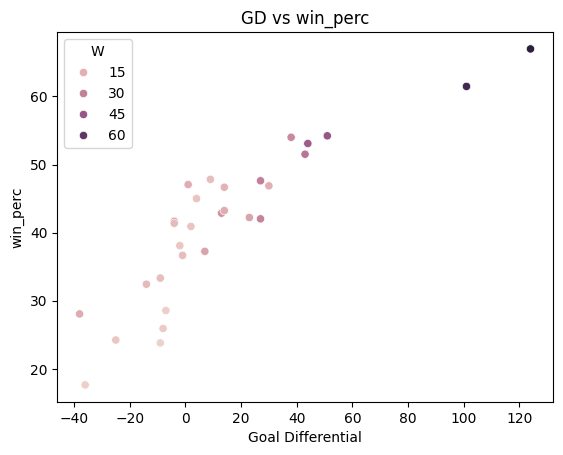

In [38]:
fig, ax = plt.subplots()
sns.scatterplot(
    lf_team_recs_top.collect().to_pandas(),
    x="GD",
    y="win_perc",
    hue="W",
    ax=ax,
)
ax.set_title('GD vs win_perc')
ax.set_ylabel('win_perc')
ax.set_xlabel('Goal Differential');

In [39]:
lf_team_recs_top.collect().write_csv('top_team_record.csv')

In [40]:
lf_team_recs = pl.LazyFrame(
    pl.concat([home, away])
        .group_by(
        'Team'
        ).agg(
        pl.col(['Matches','GF','GA','GD','W','L','D']).sum(),
        pl.col(['GF_avg', 'GA_avg', 'GD_avg']).mean().round(2),
        )
).with_columns(
    ((pl.col('W')/pl.col('Matches'))*100).alias('win_perc'),
).sort(
    by=pl.col('W'), descending=True
)

In [41]:
lf_team_recs.collect().write_csv('team_record.csv')

In [42]:
import altair as alt

In [43]:
((lf_team_recs
    .collect()
    .with_columns(
        (pl.col('GF')/('GA')).alias('scoring ratio')
    )
    .plot.point(
        x="GA",
        y="scoring ratio",
        color = "W",
    )
).properties(width=500, title="GA vs scoring ratio with wins")
    .configure_point(size=200, color='red', filled=True, opacity=0.5)
    .configure_scale(zero=False)
    .configure_axisX(tickMinStep=1)
    .configure_axisY(tickMinStep=1)
)

alt.Chart(...)

In [44]:
alt.Chart(lf_team_recs.collect().with_columns(
    (pl.col('GF')/pl.col('GA')).alias('scoring ratio')
)).mark_point().encode(
    x='GF',
    y='scoring ratio',
    color=alt.Color('W', scale=alt.Scale(scheme="dark2"))
)

alt.Chart(...)

# International Matches
This differ distinctly from World cup games since the teams do not always bring their best players nor are they always available for international duty.  This is also a much larger dataset to review because it includes friendly matches between teams.  The dominance of World cup winners should be present since they have to qualify via these matches, but the overarching theme would be one of general information. 

The same algorithm can be used which was leveraged for the World Cup data records. Modifications to the data structure should be minimal, although the devil is always in teh details.

In [46]:
pl.read_csv('./World+Cup/international_matches.csv').head(5)

ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Win Conditions,Home Stadium
i64,str,str,str,i64,i64,str,str,bool
1,"""Friendly""","""1872-11-30""","""Scotland""",0,0,"""England""",null,true
2,"""Friendly""","""1873-03-08""","""England""",4,2,"""Scotland""",null,true
3,"""Friendly""","""1874-03-07""","""Scotland""",2,1,"""England""",null,true
4,"""Friendly""","""1875-03-06""","""England""",2,2,"""Scotland""",null,true
5,"""Friendly""","""1876-03-04""","""Scotland""",3,0,"""England""",null,true


In [83]:
lf_int_results = pl.LazyFrame(
    pl.read_csv('./World+Cup/international_matches.csv').with_columns(
        pl.col('Date').str.to_datetime('%Y-%m-%d', time_unit=None),
        pl.col('Date').str.to_datetime('%Y-%m-%d', time_unit=None).dt.year().cast(pl.Int16).alias('Year'),
        pl.col('Tournament').cast(pl.Categorical),
        pl.col('Home Goals').cast(pl.Int8).alias('HGF'),
        pl.col('Away Goals').cast(pl.Int8).alias('AGF'),
        pl.col('Home Goals').cast(pl.Int8).alias('AGA'),
        pl.col('Away Goals').cast(pl.Int8).alias('HGA'),
        (pl.col('Home Goals') - pl.col('Away Goals')).cast(pl.Int8).alias('HGD'),
        (pl.col('Away Goals') - pl.col('Home Goals')).cast(pl.Int8).alias('AGD'),
        (pl.col('Away Goals') + pl.col('Home Goals')).cast(pl.Int8).alias('Match_goals'),
        pl.when(pl.col('Home Goals') > pl.col('Away Goals'))
            .then(pl.col('Home Team'))
            .when(pl.col('Away Goals') > pl.col('Home Goals'))
            .then(pl.col('Away Team'))
            .when(pl.col('Home Goals') == pl.col('Away Goals'))
            .then(pl.lit('Draw'))
            .alias('Winner'),
    )
)

In [84]:
lf_int_results.collect().head(5)

ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Win Conditions,Home Stadium,Year,HGF,AGF,AGA,HGA,HGD,AGD,Match_goals,Winner
i64,cat,datetime[μs],str,i64,i64,str,str,bool,i16,i8,i8,i8,i8,i8,i8,i8,str
1,"""Friendly""",1872-11-30 00:00:00,"""Scotland""",0,0,"""England""",null,true,1872,0,0,0,0,0,0,0,"""Draw"""
2,"""Friendly""",1873-03-08 00:00:00,"""England""",4,2,"""Scotland""",null,true,1873,4,2,4,2,2,-2,6,"""England"""
3,"""Friendly""",1874-03-07 00:00:00,"""Scotland""",2,1,"""England""",null,true,1874,2,1,2,1,1,-1,3,"""Scotland"""
4,"""Friendly""",1875-03-06 00:00:00,"""England""",2,2,"""Scotland""",null,true,1875,2,2,2,2,0,0,4,"""Draw"""
5,"""Friendly""",1876-03-04 00:00:00,"""Scotland""",3,0,"""England""",null,true,1876,3,0,3,0,3,-3,3,"""Scotland"""


In [86]:
home = lf_int_results.select(
    ["Home Team",'HGF','HGA','HGD','Winner', 'Match_goals']
).rename(
    {"Home Team":'Team','HGF':'GF','HGA':'GA','HGD':'GD', 'Match_goals':'TMG'}
).with_columns(
    pl.when(pl.col('Team') == pl.col('Winner')).then(1).otherwise(0).alias('W'),
    pl.when((pl.col('Team') != pl.col('Winner'))&(pl.col('Winner') != pl.lit('Draw'))).then(1).otherwise(0).alias('L'),
    pl.when(pl.col('Winner') == pl.lit('Draw')).then(1).otherwise(0).alias('D'),
).group_by(
    'Team'
).agg(
    pl.len().alias('Matches'),
    pl.col(['GF','GA','GD','TMG']).sum(),
    pl.col(['GF','GA','GD','TMG']).mean().round(2).name.suffix('_avg'),
    pl.col(['W','L','D']).sum(),
).sort(
    by='Matches',descending=True
).collect()

In [87]:
away = lf_int_results.select(
    ["Home Team",'HGF','HGA','HGD','Winner', 'Match_goals']
).rename(
    {"Home Team":'Team','HGF':'GF','HGA':'GA','HGD':'GD', 'Match_goals':'TMG'}
).with_columns(
    pl.when(pl.col('Team') == pl.col('Winner')).then(1).otherwise(0).alias('W'),
    pl.when((pl.col('Team') != pl.col('Winner'))&(pl.col('Winner') != pl.lit('Draw'))).then(1).otherwise(0).alias('L'),
    pl.when(pl.col('Winner') == pl.lit('Draw')).then(1).otherwise(0).alias('D'),
).group_by(
    'Team'
).agg(
    pl.len().alias('Matches'),
    pl.col(['GF','GA','GD','TMG']).sum(),
    pl.col(['GF','GA','GD','TMG']).mean().round(2).name.suffix('_avg'),
    pl.col(['W','L','D']).sum(),
).sort(
    by='Matches',descending=True
).collect()

In [90]:
lf_internation_records_all = pl.LazyFrame(
    pl.concat([home, away])
        .group_by(
        'Team'
        ).agg(
        pl.col(['Matches','GF','GA','GD','TMG','W','L','D']).sum(),
        pl.col(['GF_avg', 'GA_avg', 'GD_avg','TMG_avg']).mean().round(2),
        )
).with_columns(
    ((pl.col('W')/pl.col('Matches'))*100).alias('win_perc'),
).sort(
    by=pl.col('W'), descending=True
)

In [93]:
lf_internation_records_all.collect().filter(
    (pl.col('Matches') > 500) &
    (pl.col('TMG_avg')>3) & (pl.col('GD_avg').is_between(0, 1))
)

Team,Matches,GF,GA,GD,TMG,W,L,D,GF_avg,GA_avg,GD_avg,TMG_avg,win_perc
str,u32,i64,i64,i64,i64,i32,i32,i32,f64,f64,f64,f64,f64
"""France""",922,1854,990,864,2844,532,200,190,2.01,1.07,0.94,3.08,57.700651
"""Denmark""",826,1782,988,794,2770,454,208,164,2.16,1.2,0.96,3.35,54.96368
"""Belgium""",806,1668,1066,602,2734,430,220,156,2.07,1.32,0.75,3.39,53.349876
"""Japan""",782,1498,852,646,2350,416,186,180,1.92,1.09,0.83,3.01,53.196931
"""Poland""",772,1518,846,672,2364,394,182,196,1.97,1.1,0.87,3.06,51.036269
"""Switzerland""",820,1408,1128,280,2536,366,270,184,1.72,1.38,0.34,3.09,44.634146


In [94]:
lf_internation_records_all.collect().filter(
    pl.col('Team')=='England' 
)

Team,Matches,GF,GA,GD,TMG,W,L,D,GF_avg,GA_avg,GD_avg,TMG_avg,win_perc
str,u32,i64,i64,i64,i64,i32,i32,i32,f64,f64,f64,f64,f64
"""England""",970,2290,868,1422,3158,612,148,210,2.36,0.89,1.47,3.26,63.092784
